<center> <h1>Homework 6 | DATA 5600</h1> </center>
<center> <h2>Multiple Linear Regression Additional Variable Types</h2> </center>
<center> <h3> Oliver Heady <h3> <center>

In [ ]:
# load packages here
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.anova import anova_lm

## Data and Description

**Note that for the sake of length for this homework assignment, I am not having you check the model assumptions. You certainly can, if you would like, and in "real life" you would definitely need to do this prior to any statistical inference.**

Macroeconomists often speculate that life expectancy is linked with the economic well-being of a country. Macroeconomists also hypothesize that Organisation for Economic Co-operation and Development (OECD) (an international think tank charged with promoting policies that will improve global social and economic well-being) members will have longer life expectancy. To test these hypotheses, the LifeExpectancy.txt data set (found on Canvas) contains the following information:

| Variable | Description                                        |
|----------|----------------------------------------------------|
| LifeExp  | Average life expectancy in years                   |
| Country  | Country name                                       |
| Group    | Is the country a member of OECD, Africa, or other? |
| PPGDP    | Per person GDP (on the log scale)                  |

The Group variable indicates if the country is a member of the OECD, a member of the African continent, or belonging to neither group (other). **Note that the Country variable is just for your reference - you will not use this variable in your model.**

Download LifeExpectancy.txt, and put it in the same folder this Jupyter Notebook.



#### 1. Read in the data set, call it "life" and remove the "Row" column. Print a summary of the data, and expore the data to make sure the data makes sense.

In [ ]:
life = pd.read_table("/content/LifeExpectancy.txt", delimiter = ' ')
life = life.drop(columns=['Row'])
life.head()

,Country,Group,PPGDP,LifeExp
0,Albania,other,8.209907,75.31
1,Anguilla,other,9.528801,79.19
2,Argentina,other,9.122831,77.72
3,Armenia,other,8.016549,74.54
4,Aruba,other,10.036772,79.80


#### 2. Create and print a scatterplot with the response on the $y$-axis and the other continuous variable on the $x$-axis. Comment on the the relationship between these two variables.

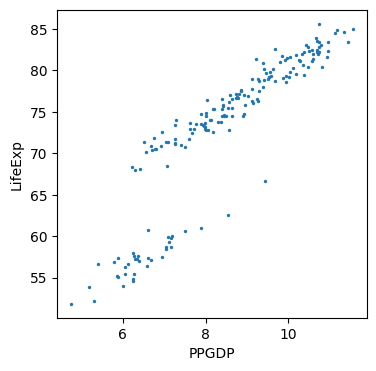

In [ ]:
# create a function that makes a scatterplot
def life_scatter():
    fig = plt.figure(figsize=(4, 4))
    plt.scatter(x = life['PPGDP'], y = life['LifeExp'], s = 2)
    plt.xlabel("PPGDP")
    plt.ylabel("LifeExp")


life_scatter()

There's a strong linear correlation, but there's also an interaction goign on. This needs to be addressed!


#### 3. Create and print a boxplot with the response on the $y$-axis and the categorical variable on the $x$-axis. Comment on the the relationship between these two variables.

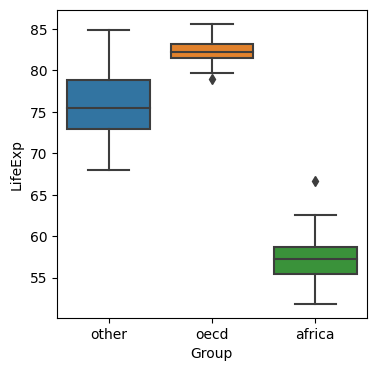

In [ ]:
plt.figure(figsize = (4, 4))
sns.boxplot(x = 'Group',
            y = 'LifeExp',
            data = life)
plt.xlabel('Group')
plt.ylabel('LifeExp')
plt.show()

Group definitely has an impact on Life Expectancy, as there are three distinct ranges for the different groups.

#### 4. Create and print a color-coded scatterplot using all of the variables that will be in your model. Hint: plot the response on the $y$-axis, the other continuous variable on the $x$-axis, and color the points by the categorical variable.

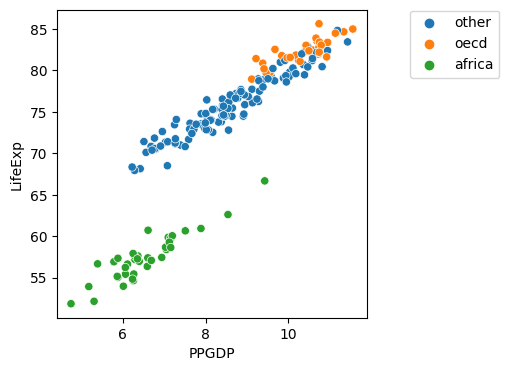

In [ ]:
plt.figure(figsize = (4, 4))
sns.scatterplot(data = life,
                x = 'PPGDP',
                y = 'LifeExp',
                hue = 'Group',
                )
plt.xlabel('PPGDP')
plt.ylabel('LifeExp')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.45, 1.02))
plt.show()

#### 5. Write out the general/theoretical model (using Greek letters/parameters) that you are thinking about applying to this data set (you will not write out the fitted model using coefficients, because you have not fit a model yet;)). DO NOT include interactions at this step. Remember, you will need to use dummy variables for Group. **USE "other" AS THE BASELINE CATEGORY**. Use variable names that are descriptive (not $y$, $x_1$, etc.).

$
LifeExp_i = \beta_1*PPGDP + \beta_2*I(Group=africa) + \beta_3*I(Group=oecd)
$

#### 6. Code indicator/dummy variables for Group.

In [ ]:
LifeExp_dummy = pd.get_dummies(life,
                              columns = ['Group'])
LifeExp_dummy.head()

,Country,PPGDP,LifeExp,Group_africa,Group_oecd,Group_other
0,Albania,8.209907,75.31,0,0,1
1,Anguilla,9.528801,79.19,0,0,1
2,Argentina,9.122831,77.72,0,0,1
3,Armenia,8.016549,74.54,0,0,1
4,Aruba,10.036772,79.80,0,0,1


#### 7. Fit a multiple linear regression model to the data (no transformations, no interactions, etc.) using "other" as the baseline for group. Print a summary of the results.

In [ ]:
y = LifeExp_dummy['LifeExp']
X_full = sm.add_constant(LifeExp_dummy[['PPGDP',
                                       'Group_africa', 'Group_oecd'
                                       ]])
mod_full = sm.OLS(y, X_full)
res_full = mod_full.fit()
res_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LifeExp   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     4080.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):          4.48e-163
Time:                        04:05:52   Log-Likelihood:                -268.31
No. Observations:                 181   AIC:                             544.6
Df Residuals:                     177   BIC:                             557.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           50.9579      0.653     78.070      0.000      49.670      52.246
PPGDP            2.8769      0.075     38.470      0.000       2.729       3.024
Group_africa   -12.2943      0.257    -47.789      0.000     -12.802     -11.787
Group_oecd       1.5298      0.254      6.019      0.000       1.028       2.031
==============================================================================
Omnibus:                        0.441   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.802   Jarque-Bera (JB):                0.333
Skew:                           0.105   Prob(JB):                        0.847
Kurtosis:                       3.015   Cond. No.                         75.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 8. Briefly interpret the intercept (like we did in class). **Note that you will need to use the word "average" (or similar) twice since you are predicting an average already.** You will need to do this (say average twice) here and with the questions that follow when interpreting.


For countries with a PPGDP of 0 and from the 'other' category, their average life expectancy will be 50.9579 years.


#### 9. Briefly interpret the coefficient for PPGDP (log scale) (like we did in class). You do not need to un-transform anything - you can just write something like "per person GDP (log scale)" in your response.


Countries in the same group will have an average of 2.8769 more years of life expectancy for each one-unit increase in per person GDP (log scale).


#### 10. For equal per person GDP (log scale), how does life expectancy change for countries that are members of the OECD compared to countries that are on the African continent? Show how you obtained this number, and briefly interpret this number (like we did in class).


For equal per person GDP (log scale), life expectancy increases by 13.8421 years for countries that are menbers of the OECD compared to countries on the African Continent.

I determined this by taking the coefficient for OECD, 1.258, and subtracting the coefficient for Africa, -12.2943.

#### 11. Briefly interpret the 95% confidence interval for I(Group=Africa).


We are 95% confident that countries in Africa will have an average life expectancy less than the 'other' group by between -12.802	and -11.787 years.

#### 12. Use the `anova_lm` function from statsmodels to conduct a hypothesis test that tests some coefficients simultaneously. Specifically, test if Group as a whole has a significant effect on LifeExp. What do you conclude from the result of the test? Hint: you will need to create another linear model and compare it with the one you made previously.

In [ ]:
y = LifeExp_dummy['LifeExp']
X_full = sm.add_constant(LifeExp_dummy[['PPGDP']])

mod_ng = sm.OLS(y, X_full)
res_ng = mod_ng.fit()
res_ng.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LifeExp   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     723.5
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           8.69e-65
Time:                        04:05:52   Log-Likelihood:                -506.58
No. Observations:                 181   AIC:                             1017.
Df Residuals:                     179   BIC:                             1024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.5956      1.609     19.013      0.000      27.420      33.771
PPGDP          5.0097      0.186     26.898      0.000       4.642       5.377
==============================================================================
Omnibus:                        5.899   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                6.014
Skew:                          -0.422   Prob(JB):                       0.0494
Kurtosis:                       2.706   Cond. No.                         47.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
anova_lm(res_ng, res_full)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,179.0,2858.842765,0.0,NaN,NaN,NaN
1,177.0,205.477622,2.0,2653.365143,1142.814545,6.409470e-102


The model with group included has a very low p-value, meaning at least one group has a significant impact on the response variable.


#### 13. Create a 95% prediction interval for the average life expectancy of a country in the OECD with an average per person GDP (log scale) of 9.5. Print the result, and briefly interpret this interval (like we did in class). (Use the `get_prediction` function on the `OLS` object.)

In [ ]:
# 1 for something?, 9.5 for our PPGDP value, 0 for not-africa group, and 1 for yes OECD
pred = res_full.get_prediction([1, 9.5, 0, 1])
pred.summary_frame(alpha = 0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,79.818286,0.203924,79.415851,80.22072,77.654243,81.982328


We are 95% confident that a new country in OECD, with an average per person GDP of 9.5 (log scale) will have an average life expectancy between 77.65 and 81.98 years.

#### 14. Plot the fitted model on the scatterplot with the two continuous variables on the axes, colored by the categorical variable. Hint: you should have 3 different lines on your plot, and you will *not* need to have different line types or point shapes (you *will* need to have different colors).


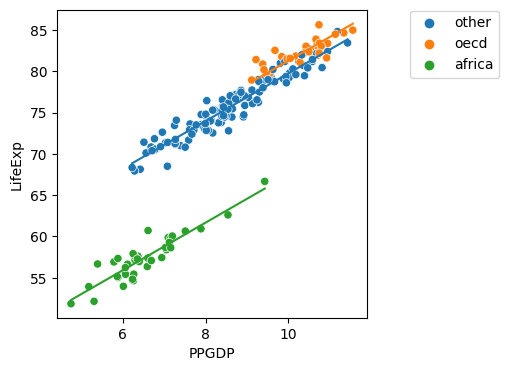

In [ ]:
plt.figure(figsize = (4, 4))
sns.scatterplot(data = life,
                x = 'PPGDP',
                y = 'LifeExp',
                hue = 'Group',
                )
sns.lineplot(x = life['PPGDP'],
             y = res_full.fittedvalues,
             hue = life['Group'],
             legend = False)
plt.xlabel('PPGDP')
plt.ylabel('LifeExp')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.45, 1.02))
plt.show()

#### 15. Fit a multiple linear regression model to the data **using the dummy variables you created**, and include an interaction term between PPGDP and Group. *USE "other" AS THE BASELINE CATEGORY FOR GROUP*. Print a summary of the results.

In [ ]:
LifeExp_dummy['PPGDP_Group_africa'] = LifeExp_dummy['PPGDP'] * LifeExp_dummy['Group_africa']
LifeExp_dummy['PPGDP_Group_oecd'] = LifeExp_dummy['PPGDP'] * LifeExp_dummy['Group_oecd']

y = LifeExp_dummy['LifeExp']
X_inter = sm.add_constant(LifeExp_dummy[['PPGDP', 'Group_africa', 'Group_oecd', 'PPGDP_Group_africa', 'PPGDP_Group_oecd']])
mod_inter = sm.OLS(y, X_inter)
res_inter = mod_inter.fit()
res_inter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LifeExp   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     2551.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):          1.98e-161
Time:                        04:26:30   Log-Likelihood:                -263.63
No. Observations:                 181   AIC:                             539.3
Df Residuals:                     175   BIC:                             558.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 50.4240      0.713     70.734      0.000      49.017      51.831
PPGDP                  2.9388      0.082     35.896      0.000       2.777       3.100
Group_africa         -11.8951      1.475     -8.063      0.000     -14.807      -8.983
Group_oecd            11.2920      3.213      3.514      0.001       4.950      17.634
PPGDP_Group_africa    -0.0413      0.212     -0.194      0.846      -0.461       0.378
PPGDP_Group_oecd      -0.9527      0.313     -3.046      0.003      -1.570      -0.335
==============================================================================
Omnibus:                        0.578   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.749   Jarque-Bera (JB):                0.381
Skew:                           0.105   Prob(JB):                        0.827
Kurtosis:                       3.078   Cond. No.                         374.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 16. Write out the fitted model (using coefficients values from above) for a model with PPGDP, Group, and an interaction between PPGDG and Group. Remember, you will need to use dummy variables for Group. **USE "other" AS THE BASELINE CATEGORY**. Use variable names that are descriptive (not $y$, $x_1$, etc.).


$
LifeExp_i = 2.9388*PPGDP - 11.8951*I(Group=africa) + 11.2920*I(Group=oecd) - 0.0413*I(PPGDPGroupafrica) - 0.9527*I(PPGDPGroupoecd)
$

#### 17. Use the `anova_lm` function from statsmodels to test if the overall interaction between PPGDP and Group is significant. Print the result. What do you conclude?

In [ ]:
anova_lm(res_full, res_inter)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,177.0,205.477622,0.0,NaN,NaN,NaN
1,175.0,195.120227,2.0,10.357395,4.644685,0.010828


The p-value is 0.01, meaning the interaction is indeed significant.

#### 18. Plot the fitted model (with the interaction included) on the scatterplot with the two continuous variables on the axes, colored by the categorical variable. Hint: you should have 3 different lines on your plot, and you will *not* need to have different line types or point shapes (you *will* need to have different colors).

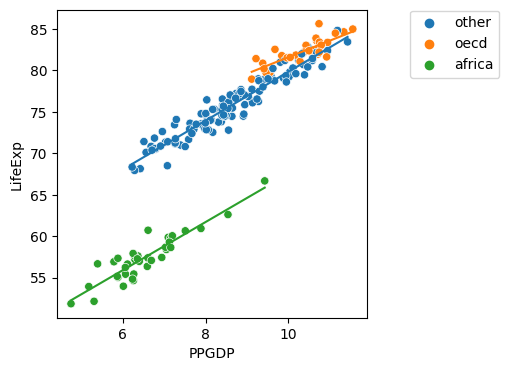

In [ ]:
plt.figure(figsize = (4, 4))
sns.scatterplot(data = life,
                x = 'PPGDP',
                y = 'LifeExp',
                hue = 'Group',
                )
sns.lineplot(x = life['PPGDP'],
             y = res_inter.fittedvalues,
             hue = life['Group'],
             legend = False)
plt.xlabel('PPGDP')
plt.ylabel('LifeExp')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.45, 1.02))
plt.show()

#### 19. How did the fitted lines change when you included an interaction term compared with when you did not include an interaction term?


The oecd line changed its slope.

#### 20. What is the effect of PPGDP on LifeExp for countries in a country other than those in the OECD or Africa (i.e. in the "other" category)? You should report a number in a complete sentence (as done in class toward the end of the notes). Since this is a continuous-categorical interaction, and since we are focusing on the effect of the continuous variable, you should use the "one unit increase" terminology in your response.

For countries in the 'other' category, a one unit increase in PPGSP will equate to an average increase of 2.9388 in life expectancy.

#### 21. What is the effect of PPGDP on LifeExp for countries in the OECD? You should report a number in a complete sentence (as done in class toward the end of the notes). Since this is a continuous-categorical interaction, and since we are focusing on the effect of the continuous variable, you should use the "one unit increase" terminology in your response.

For countries in the OECD, a one unit increase in PPGDP will equate to an average increase of 1.9861 years of life expectancy.


calculation:
2.9388 + (-0.9527)

#### 22. What is the effect of PPGDP on LifeExp for countries in Africa? You should report a number in a complete sentence (as done in class toward the end of the notes). Since this is a continuous-categorical interaction, and since we are focusing on the effect of the continuous variable, you should use the "one unit increase" terminology in your response.

For countries in Africa, a one unit increase in PPGDP will equate to an average increase of 2.8375 years of life expectancy.


calculation:
2.9388 + (-0.0413)

#### 23. What is the effect of belonging to the OECD on LifeExp for countries with a PPGDP of 9? You should report a number in a complete sentence (as done in class toward the end of the notes).

For countries with a per person GDP of 9 (log scale), belonging to the OECD results in an average decrease in life expectancy of 2.72 years

calculation:
11.292 + (9 * (-0.9527))

#### 24. What is the effect of belonging to the OECD on LifeExp for countries with a PPGDP of 11? You should report a number in a complete sentence (as done in class toward the end of the notes).

For countries with a per person GDP of 11 (log scale), belonging to the OECD results in an average decrease in life expectancy of 0.81 years

calculation:
11.292 + (11 * (-0.9527))

#### 25. Briefly summarize what you learned, personally, from this analysis about the statistics, model fitting process, etc.

This analysis taught me about the importance of understanding the effect of models on your analysis. Including this interaction in the model resulted in an r-squared of 98.6 which is awesome. Just adjusting the slope of one line really made a huge difference.

#### 26. Briefly summarize what you learned from this analysis *to a non-statistician*. Write a few sentences about (1) the purpose of this data set and analysis and (2) what you learned about this data set from your analysis. Write your response as if you were addressing a business manager (avoid using statistics jargon) and just provide the main take-aways.


Through this analysis, we explored how various factors, like a country's economic status measured by GDP (Gross Domestic Product per person) and membership in international organizations like the OECD, might influence its citizens' life expectancy. Here's what we found:

Economic Prosperity and Health: There's a clear link between a country's wealth and the health of its people. As the average income per person increases, so does life expectancy. This might be due to better healthcare, nutrition, and living conditions that come with economic growth.

Influence of International Groups: Being part of the OECD, which is a group of wealthier countries, does not always mean a country's people will live longer. In fact, at certain levels of wealth, OECD membership was associated with a slight decrease in life expectancy. This was a surprising finding, suggesting that factors other than just economic ones can impact health.

Complex Relationships: The analysis showed that the relationship between money and health is not straightforward. For example, while African countries benefit significantly from economic growth in terms of their citizens' life expectancy, OECD countries did not see as much of an impact. This suggests that once a country reaches a certain level of wealth, other factors may become more important for improving health.

In summary, while more money in a country's economy generally means longer lives for its people, the relationship varies by region and economic grouping. Understanding these subtleties can help policymakers and business leaders make more informed decisions about where and how to invest in improving public health.